In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

etf_path = "VanguardSectorETFs"
starting_investment = 1000
dict_of_dfs = {}
daily_best_etf = []

In [2]:
def load_data():
    for file in os.listdir(etf_path):
        df = pd.read_csv(os.path.join(etf_path,file))
        df.set_index('Date', inplace=True)
        etf_name = file.split(".")[0]
        dict_of_dfs[etf_name] = df

In [3]:
load_data()

In [4]:
dict_of_dfs['VAW']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-30,48.630001,49.220001,48.630001,49.220001,35.993584,8700
2004-02-02,49.200001,49.200001,49.049999,49.049999,35.869274,1300
2004-02-03,48.900002,48.900002,48.700001,48.700001,35.613323,6900
2004-02-04,48.549999,48.599998,48.299999,48.299999,35.320801,7100
2004-02-05,48.500000,48.889999,48.500000,48.869999,35.737633,20900
...,...,...,...,...,...,...
2021-05-28,192.000000,192.000000,190.479996,191.380005,191.380005,138100
2021-06-01,193.029999,194.220001,192.699997,194.100006,194.100006,184200
2021-06-02,194.559998,194.559998,192.089996,192.360001,192.360001,211100


In [5]:
for df in dict_of_dfs.values():
    rets = []
    df['Daily Return'] = (df['Close'] - df['Open']) / df['Open']

In [6]:
dates = dict_of_dfs['VAW'].index

In [7]:
dict_of_dfs['VAW'].loc[dates[0]]

Open              48.630001
High              49.220001
Low               48.630001
Close             49.220001
Adj Close         35.993584
Volume          8700.000000
Daily Return       0.012132
Name: 2004-01-30, dtype: float64

In [8]:
dict_of_dfs['VIS'].loc[dates[0]]

KeyError: '2004-01-30'

In [20]:
shorted_etf = []
short_return = []
cash_total = []

cash = starting_investment
prev_date = None
for i, date in enumerate(dates):
    # short prev best
    if i > 0:
        # find prev best
        best_prev_day_ret = 0
        best_prev_day_ret_etf = None
        
        for etf in dict_of_dfs:
            row = []
            try:
                row = dict_of_dfs[etf].loc[prev_date]
               
                # date not in csv
            except KeyError:
                continue
                
            if best_prev_day_ret_etf is None:
                best_prev_day_ret_etf = etf
                best_prev_day_ret = row['Daily Return']
            else:
                if row['Daily Return'] > dict_of_dfs[best_prev_day_ret_etf].loc[prev_date]['Daily Return']:
                    best_prev_day_ret_etf = etf
                    best_prev_day_ret = row['Daily Return']
                    
        # Got prev best now short it and get that return
        ret_by_short = (dict_of_dfs[best_prev_day_ret_etf].loc[date]['Open'] - dict_of_dfs[best_prev_day_ret_etf].loc[date]['Close']) / dict_of_dfs[best_prev_day_ret_etf].loc[date]['Close']
        cash = cash*(1+ret_by_short)
        
        short_return.append(ret_by_short)
        shorted_etf.append(best_prev_day_ret_etf)
    
    cash_total.append(cash)
    if i == 0:
        short_return.append(0)
        shorted_etf.append("")
    prev_date = date

In [21]:
cash

32040.02296223226

In [31]:
short_df = pd.DataFrame(index=dates)

In [33]:
short_df['Cash'] = cash_total
short_df['Short Return'] = short_return
short_df['Shorted ETF'] = shorted_etf

In [28]:
len(cash_total)

4367

In [29]:
len(short_return)

4367

In [30]:
len(shorted_etf)

4367

In [35]:
short_df

,Cash,Short Return,Shorted ETF
Date,,,
2004-01-30,1000.000000,0.000000,
2004-02-02,1003.058145,0.003058,VAW
2004-02-03,996.356636,-0.006681,VHT
2004-02-04,993.422128,-0.002945,VHT
2004-02-05,989.949280,-0.003496,VDC
...,...,...,...
2021-05-28,31972.840805,0.002780,VFH
2021-06-01,32528.760819,0.017387,VHT
2021-06-02,32107.676537,-0.012945,VDE


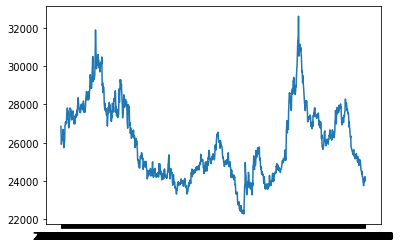

In [48]:
plt.plot(short_df.loc["2015-01-30":"2020-01-30"]['Cash'])
